## Faster RCNN Fine-tuning with PyTorch

In [29]:
import torch
import torchvision
from PIL import Image
import torchvision.transforms as T
import torchvision.models as models
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.ops import MultiScaleRoIAlign
from torchvision.models.detection import FasterRCNN
import cv2
import matplotlib.pyplot as plt

In [30]:
if torch.cuda.is_available():
    device = "cuda" 
else:
    device = "cpu"

In [31]:
# model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights = 'FasterRCNN_ResNet50_FPN_Weights.DEFAULT')
model = model.to(device)

In [32]:
first_image = T.ToTensor()(Image.open('image/FudanPed00066.png'))
first_box = torch.tensor([[248.0, 50.0, 329.0, 351.0]])
first_label = torch.tensor([1])

second_image = T.ToTensor()(Image.open('image/PennPed00011.png'))
second_box = torch.tensor([[92.0, 62.0, 236.0, 344.0], [242.0, 52.0, 301.0, 355.0]])
second_label = torch.tensor([1, 1])

print('First image size: {}'.format(first_image.size()))
print('Second image size: {}'.format(second_image.size()))

First image size: torch.Size([3, 359, 360])
Second image size: torch.Size([3, 376, 508])


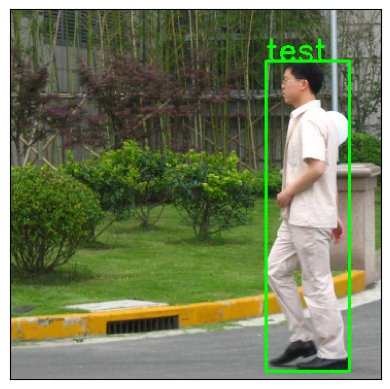

In [45]:
first_image_display = cv2.imread('image/FudanPed00066.png')
first_image_display = cv2.cvtColor(first_image_display, cv2.COLOR_BGR2RGB)

cv2.rectangle(first_image_display, (248, 50), (329, 351), 
              color = (0, 255, 0), thickness = 2)
cv2.putText(first_image_display, 'test', (248, 50), cv2.FONT_HERSHEY_SIMPLEX, 
            1, (0, 255, 0), thickness = 2)

# plt.figure(figsize = (20, 30))
plt.imshow(first_image_display)
plt.xticks([])
plt.yticks([])
plt.show()

In [34]:
first_input_image = first_image.clone()
second_input_image = second_image.clone()

inputs = [first_input_image.to(device), second_input_image.to(device)]

model.eval()
output = model(inputs)

print(output)

[{'boxes': tensor([[243.2258,  47.7818, 327.8421, 349.9229],
        [305.6328,  99.5300, 330.0190, 128.9751]], grad_fn=<StackBackward0>), 'labels': tensor([ 1, 34]), 'scores': tensor([0.9997, 0.0594], grad_fn=<IndexBackward0>)}, {'boxes': tensor([[ 89.9230,  59.4910, 225.3071, 342.8299],
        [244.2283,  49.8334, 304.4795, 362.8903],
        [245.9230, 127.6201, 276.5671, 197.8546],
        [252.0380,  15.8489, 369.9043, 367.3777],
        [245.7938,  99.7875, 294.3491, 198.7888],
        [243.9077, 121.8000, 276.3352, 198.4012],
        [247.6824,  51.5020, 301.1053, 203.1744],
        [245.5552,  95.3306, 295.3181, 199.0098],
        [274.8139,  96.3891, 301.2039, 188.7243],
        [123.6462,  56.9277, 191.9256, 338.0053],
        [240.7440,  44.0858, 333.5300, 235.6630],
        [267.6390, 100.0402, 299.7915, 187.5079]], grad_fn=<StackBackward0>), 'labels': tensor([ 1,  1, 27,  1, 27, 31,  1, 31, 27,  1,  1, 31]), 'scores': tensor([0.9996, 0.9931, 0.7120, 0.6038, 0.3407, 0.3300

In [7]:
first_input_image = first_image.clone()
first_target = {
    'boxes': first_box.clone().to(device),
    'labels' : first_label.clone().to(device)
    
} 

second_input_image = second_image.clone()
second_target = {
    'boxes': second_box.clone().to(device),
    'labels' : second_label.clone().to(device)
    
} 

inputs = [first_input_image.to(device), second_input_image.to(device)]
targets = [first_target, second_target]

model.train()
model(inputs, targets)

{'loss_classifier': tensor(0.0308, grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0.0299, grad_fn=<DivBackward0>),
 'loss_objectness': tensor(0.0065, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_rpn_box_reg': tensor(0.0048, grad_fn=<DivBackward0>)}

In [8]:
model.eval()

print(model)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [9]:
first_image = first_image.clone()
second_image = second_image.clone()

inputs = [first_image.to(device), second_image.to(device)]
trans_image_list, trans_target_list = model.transform(inputs)

print('Tensor size: {}'.format(trans_image_list.tensors.size()))

Tensor size: torch.Size([2, 3, 800, 1088])


In [10]:
print('transform ( GeneralizedRCNNTransform) parameters:')
print('min_size: {}'.format(model.transform.min_size))
print('max_size: {}'.format(model.transform.max_size))
print('image_mean: {}'.format(model.transform.image_mean))
print('image_std: {}'.format(model.transform.image_std))

transform ( GeneralizedRCNNTransform) parameters:
min_size: (800,)
max_size: 1333
image_mean: [0.485, 0.456, 0.406]
image_std: [0.229, 0.224, 0.225]


In [11]:
ft_min_size = 300
ft_max_size = 500

ft_mean = [0.485, 0.456, 0.406]
ft_std = [0.229, 0.224, 0.225]

In [12]:
backbone_out = model.backbone(trans_image_list.tensors)

In [13]:
for key, value in backbone_out.items():
    print('{}: {}'.format(key, value.size()))

0: torch.Size([2, 256, 200, 272])
1: torch.Size([2, 256, 100, 136])
2: torch.Size([2, 256, 50, 68])
3: torch.Size([2, 256, 25, 34])
pool: torch.Size([2, 256, 13, 17])


In [14]:
print('Number of output channel of the backbone: {}'.format(model.backbone.out_channels))

Number of output channel of the backbone: 256


In [15]:
alexnet = models.alexnet(weights = 'AlexNet_Weights.DEFAULT')

print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [16]:
ft_backbone = alexnet.features
ft_backbone.out_channels = 256

In [17]:
model.rpn

RegionProposalNetwork(
  (anchor_generator): AnchorGenerator()
  (head): RPNHead(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
      )
    )
    (cls_logits): Conv2d(256, 3, kernel_size=(1, 1), stride=(1, 1))
    (bbox_pred): Conv2d(256, 12, kernel_size=(1, 1), stride=(1, 1))
  )
)

In [18]:
print('Anchor sizes: {}'.format(model.rpn.anchor_generator.sizes))
print('Aspect ratios: {}'.format(model.rpn.anchor_generator.aspect_ratios))

Anchor sizes: ((32,), (64,), (128,), (256,), (512,))
Aspect ratios: ((0.5, 1.0, 2.0), (0.5, 1.0, 2.0), (0.5, 1.0, 2.0), (0.5, 1.0, 2.0), (0.5, 1.0, 2.0))


In [19]:
ft_anchor_generator = AnchorGenerator(sizes = ((32, 64, 128, 256),), 
                                      aspect_ratios = ((0.5, 1.0, 2.0),))

In [20]:
model.roi_heads

RoIHeads(
  (box_roi_pool): MultiScaleRoIAlign(featmap_names=['0', '1', '2', '3'], output_size=(7, 7), sampling_ratio=2)
  (box_head): TwoMLPHead(
    (fc6): Linear(in_features=12544, out_features=1024, bias=True)
    (fc7): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (box_predictor): FastRCNNPredictor(
    (cls_score): Linear(in_features=1024, out_features=91, bias=True)
    (bbox_pred): Linear(in_features=1024, out_features=364, bias=True)
  )
)

In [21]:
print('Box RoI Pool Parameters:')
print('featmap_names: {}'.format(model.roi_heads.box_roi_pool.featmap_names))
print('output_size: {}'.format(model.roi_heads.box_roi_pool.output_size))
print('sampling_ratio: {}'.format(model.roi_heads.box_roi_pool.sampling_ratio))

Box RoI Pool Parameters:
featmap_names: ['0', '1', '2', '3']
output_size: (7, 7)
sampling_ratio: 2


In [22]:
backbone_out.keys()

odict_keys(['0', '1', '2', '3', 'pool'])

In [23]:
type(ft_backbone(torch.rand((2, 3, 300, 300))))

torch.Tensor

In [24]:
ft_roi_pooler = MultiScaleRoIAlign(featmap_names = ['0'], output_size = 4, sampling_ratio = 1)

In [25]:
ft_model = FasterRCNN(backbone = ft_backbone,
                      num_classes = 2, 
                      min_size = ft_min_size, 
                      max_size = ft_max_size, 
                      image_mean = ft_mean, 
                      image_std = ft_std, 
                      rpn_anchor_generator = ft_anchor_generator, 
                      box_roi_pool = ft_roi_pooler)

ft_model = ft_model.to(device)

In [26]:
first_input_image = first_image.clone()
second_input_image = second_image.clone()

inputs = [first_input_image.to(device), second_input_image.to(device)]

ft_model.eval()
output = ft_model(inputs)

print(output)

[{'boxes': tensor([[2.3252e+02, 9.4679e+00, 2.5486e+02, 5.9161e+01],
        [2.2428e+02, 1.4635e+01, 2.6923e+02, 5.7832e+01],
        [8.0719e+01, 1.3702e+02, 1.8336e+02, 1.9179e+02],
        [2.9150e+01, 1.8594e+02, 5.4115e+01, 2.3767e+02],
        [2.2716e+02, 0.0000e+00, 2.6750e+02, 1.7596e+01],
        [2.0246e+02, 0.0000e+00, 2.8773e+02, 4.3619e+01],
        [2.3142e+02, 0.0000e+00, 2.5480e+02, 2.2561e+01],
        [1.2855e+00, 1.7968e+02, 9.5249e+01, 2.3523e+02],
        [1.6399e+00, 2.6213e+02, 8.9340e+01, 3.1717e+02],
        [1.7505e+01, 1.5427e+02, 7.4648e+01, 1.8218e+02],
        [1.7221e+01, 1.9546e+02, 8.0531e+01, 2.2462e+02],
        [5.9520e+01, 1.5306e+02, 1.1626e+02, 1.8106e+02],
        [1.5613e+00, 2.3988e+02, 1.2632e+02, 3.5258e+02],
        [1.6428e+01, 1.5035e+02, 6.6719e+01, 2.6554e+02],
        [6.8619e+01, 1.4052e+02, 9.5438e+01, 1.9269e+02],
        [2.4329e+02, 1.2238e+02, 3.2998e+02, 1.9736e+02],
        [1.3983e+02, 1.5006e+02, 1.9545e+02, 1.8277e+02],
   

In [27]:
first_input_image = first_image.clone()
first_target = {
    'boxes': first_box.clone().to(device),
    'labels' : first_label.clone().to(device)
    
} 

second_input_image = second_image.clone()
second_target = {
    'boxes': second_box.clone().to(device),
    'labels' : second_label.clone().to(device)
    
} 

inputs = [first_input_image.to(device), second_input_image.to(device)]
targets = [first_target, second_target]

ft_model.train()
ft_model(inputs, targets)

{'loss_classifier': tensor(0.6522, grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0.0353, grad_fn=<DivBackward0>),
 'loss_objectness': tensor(0.6830, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_rpn_box_reg': tensor(0.0063, grad_fn=<DivBackward0>)}